<h4>Importing LIbraries</h4>

In [25]:
import math
import numpy as np
import matplotlib
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random

<h4>Making A Dataframe on which k-means clustering is Performed</h4>

In [26]:
X1=[1,1,0,2,5,6,4,5]
X2=[4,3,4,5,1,2,0,2]
G=[1,1,2,2,1,2,1,2]

info=pd.DataFrame(list(zip(X1, X2, G)),columns=['X1','X2','G'])

<h4>Defining Functions</h4>

In [27]:
#Function to calculate Centroid
def cal_centroid(data):
    x=data.mean()
    return x

In [28]:
#Separating data points of each cluster
def assign_g(data):
    one_g=[]
    two_g=[]
    new_data=data.iloc[:,:-1]
    for i in range(len(data)):
        if data['G'][i]==1:
            one_g.append(new_data.iloc[i,:])
        else:
            two_g.append(new_data.iloc[i,:])
    one = pd.DataFrame(one_g)
    two = pd.DataFrame(two_g)
    return (one,two)

In [29]:
#Creating Clusters acoording to k-Means Clustering Algorithm
def new_grp(data):
    one_val=[]
    two_val=[]
    check_data=data.iloc[:,-1]
    final_data=data
    new_data=data.iloc[:,:-1]
    one,two=assign_g(data)
    centroid1=cal_centroid(one)
    centroid2=cal_centroid(two)
    for i in range(len(data)):
        c1=centroid1-new_data.iloc[i,:]
        c1=c1**2
        c1=np.sqrt(sum(c1))
        one_val.append(c1)
        
        c2=centroid2-new_data.iloc[i,:]
        c2=c2**2
        c2=np.sqrt(sum(c2))
        two_val.append(c2)
    
    for i in range(len(one_val)):
        if one_val[i]<two_val[i]:
            final_data.iloc[i,:]['G']=1
        else:
            final_data.iloc[i,:]['G']=2

    return final_data,check_data

In [30]:
#Plotting the CLusters
def plot_grp(one,two,c1,c2):
    c1=c1.to_frame()
    c1=c1.transpose()
    c2=c2.to_frame()
    c2=c2.transpose()
    plt.figure(figsize=(15,5))
    ax1=one.plot.scatter(x='X1',y='X2', figsize=(15,6),label='Cluster 1')
    ax2=two.plot.scatter(x='X1',y='X2', figsize=(15,6), ax=ax1,color='red',label='Cluster 2')
    ax3=c1.plot.scatter(x='X1',y='X2', figsize=(15,6), ax=ax1,color='green', label='Centroid 2')
    ax3=c2.plot.scatter(x='X1',y='X2', figsize=(15,6), ax=ax1,color='pink',label='Centroid 1')

In [31]:
#iterating until get the final Clusters
def iter_centroid(info):
    l=[0,0,0,0,0,0,0,0]
    prev_g=pd.Series(l)
    for i in range(0,1000):
        info,present_g=new_grp(info)
        if present_g.equals(prev_g):
            one,two=assign_g(info)
            centroid1=cal_centroid(one)
            centroid2=cal_centroid(two)
            plot_grp(one,two,centroid1,centroid2)
            break
        else:
            prev_g=present_g

Before Implementing K-means Clustering


<Figure size 1080x360 with 0 Axes>

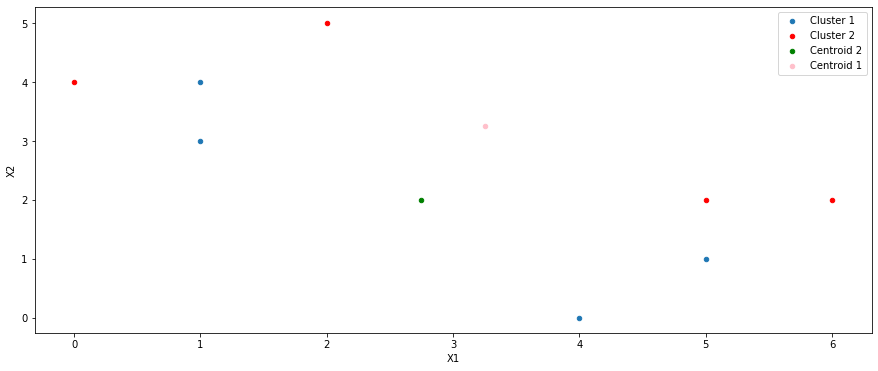

In [32]:
print('Before Implementing K-means Clustering')
one,two=assign_g(info)
centroid1=cal_centroid(one)
centroid2=cal_centroid(two)
plot_grp(one,two,centroid1,centroid2)

After Implementing K-means Clustering


<Figure size 1080x360 with 0 Axes>

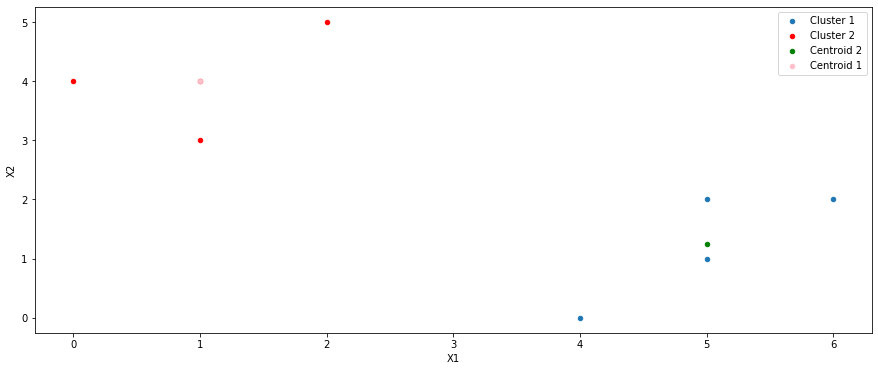

In [33]:
print('After Implementing K-means Clustering')
iter_centroid(info)